- **webbrowser** Comes with Python and opens a browser to a specific page.
- **Requests** Downloads files and web pages from the Internet.
- **Beautiful** Soup Parses HTML, the format that web pages are written in.
- **Selenium** Launches and controls a web browser. Selenium is able to fill in forms and simulate mouse clicks in this browser.


### webbrowser Module

In [1]:
import webbrowser
webbrowser.open('https://inventwithpython.com/')

True

mapIt.py with the webbrowser Module

In [ ]:
##https://www.google.com/maps/place/your_address_string

import webbrowser,sys, pyperclip
if len(sys.argv)>1:
    address= " ".join(sys.argv[1:])
else:
    address = pyperclip.paste()

webbrowser.open('https://www.google.com/maps/place/' + address)

Downloading Files from the Web with the requests Module

In [1]:
import requests
res=requests.get('https://www.gutenberg.org/cache/epub/1112/pg1112.txt')


In [9]:
res

<Response [200]>

In [2]:
type(res)

requests.models.Response

In [5]:
requests.codes.ok

200

In [11]:
res.status_code

200

In [10]:
res.status_code == requests.codes.ok

True

In [6]:
len(res.text)

179727

In [8]:
res.text[:100]

'\ufeff\r\n    The Project Gutenberg eBook of The Tragedy of Romeo and Juliet\r\n    \r\nThis ebook is for the u'

Checking for Errors

In [14]:
res = requests.get('http://inventwithpython.com/page_that_does_not_exist')
res.raise_for_status()

HTTPError: 404 Client Error: Not Found for url: http://inventwithpython.com/page_that_does_not_exist

In [15]:
res = requests.get('http://inventwithpython.com/page_that_does_not_exist')

In [16]:
res

<Response [404]>

In [17]:
import requests
res = requests.get('http://inventwithpython.com/page_that_does_not_exist')
try:
    res.raise_for_status()
except Exception as exc:
    print('There was a problem: %s' % (exc))

There was a problem: 404 Client Error: Not Found for url: http://inventwithpython.com/page_that_does_not_exist


Saving Downloaded Files to the Hard Drive

In [18]:
import requests
res = requests.get('http://www.gutenberg.org/cache/epub/1112/pg1112.txt')
res.raise_for_status()
playFile = open('RomeoAndJuliet.txt', 'wb')
for chunk in res.iter_content(100000):
    playFile.write(chunk)

The iter_content() method returns “chunks” of the content on each 
iteration through the loop. Each chunk is of the bytes data type, and you 
get to specify how many bytes each chunk will contain. One hundred 
thousand bytes is generally a good size, so pass 100000 as the argument to 
iter_content().

### Parsing HTML with the BeautifulSoup Module

In [19]:
import  requests,bs4
res=requests.get("https://nostarch.com/")
res.raise_for_status()
noStarchSoup=bs4.BeautifulSoup(res.text)
type(noStarchSoup)


bs4.BeautifulSoup

In [21]:
res

<Response [200]>

In [22]:
res.text

'<!DOCTYPE html>\n<html lang="en" dir="ltr" xmlns:og="https://ogp.me/ns#">\n<head>\n<script src="/cdn-cgi/apps/head/j5v88GAcO1Pymf91CQYvgLZqNao.js"></script><link rel="profile" href="https://www.w3.org/1999/xhtml/vocab" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<link rel="shortcut icon" href="https://nostarch.com/sites/default/files/favicon.ico" type="image/vnd.microsoft.icon" />\n<meta name="generator" content="Drupal 7 (http://drupal.org)" />\n<link rel="image_src" href="https://nostarch.com/sites/all/themes/nostarch/images/nsp_logo_long.jpg" />\n<link rel="canonical" href="https://nostarch.com/" />\n<link rel="shortlink" href="https://nostarch.com/" />\n<meta property="og:image" content="https://nostarch.com/sites/all/themes/nostarch/images/nsp_logo_long.jpg" />\n<meta name="twitter:card" content="summary" />\n<meta name="twitter:site" content="@nostarch" />\n<meta name="twitter:

In [20]:
noStarchSoup

<!DOCTYPE html>
<html dir="ltr" lang="en" xmlns:og="https://ogp.me/ns#"><head>
<script src="/cdn-cgi/apps/head/j5v88GAcO1Pymf91CQYvgLZqNao.js"></script><link href="https://www.w3.org/1999/xhtml/vocab" rel="profile"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="https://nostarch.com/sites/default/files/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<meta content="Drupal 7 (http://drupal.org)" name="generator"/>
<link href="https://nostarch.com/sites/all/themes/nostarch/images/nsp_logo_long.jpg" rel="image_src"/>
<link href="https://nostarch.com/" rel="canonical"/>
<link href="https://nostarch.com/" rel="shortlink"/>
<meta content="https://nostarch.com/sites/all/themes/nostarch/images/nsp_logo_long.jpg" property="og:image"/>
<meta content="summary" name="twitter:card"/>
<meta content="@nostarch" name="twitter:site"/>
<meta content="https://nostarch.com/index.htm

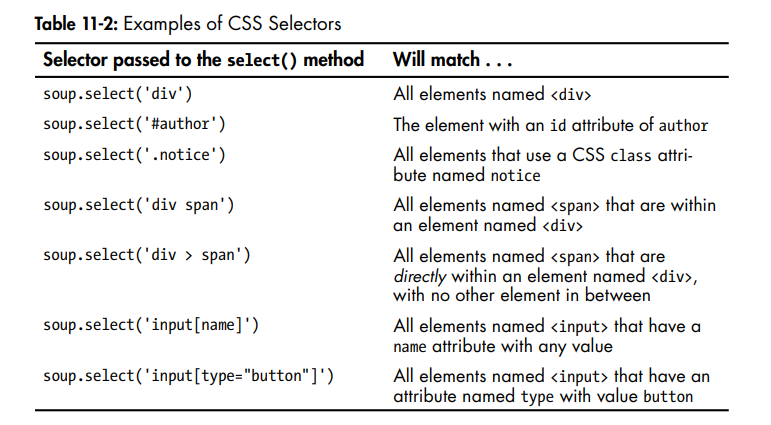

In [29]:
import  requests,bs4
res=requests.get("https://nostarch.com/")
res.raise_for_status()
noStarchSoup=bs4.BeautifulSoup(res.text)
type(noStarchSoup)

ConnectionError: HTTPSConnectionPool(host='nostarch.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000029A5D5F0F10>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [30]:
noStarchSoup

<!DOCTYPE html>
<html dir="ltr" lang="en" xmlns:og="https://ogp.me/ns#"><head>
<script src="/cdn-cgi/apps/head/j5v88GAcO1Pymf91CQYvgLZqNao.js"></script><link href="https://www.w3.org/1999/xhtml/vocab" rel="profile"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="https://nostarch.com/sites/default/files/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<meta content="Drupal 7 (http://drupal.org)" name="generator"/>
<link href="https://nostarch.com/sites/all/themes/nostarch/images/nsp_logo_long.jpg" rel="image_src"/>
<link href="https://nostarch.com/" rel="canonical"/>
<link href="https://nostarch.com/" rel="shortlink"/>
<meta content="https://nostarch.com/sites/all/themes/nostarch/images/nsp_logo_long.jpg" property="og:image"/>
<meta content="summary" name="twitter:card"/>
<meta content="@nostarch" name="twitter:site"/>
<meta content="https://nostarch.com/index.htm

In [51]:
exampleFile = open('ex.html')
noStarchSoup= bs4.BeautifulSoup(exampleFile)

In [59]:
elem= noStarchSoup.select('#author')

In [60]:
type(elem)

bs4.element.ResultSet

In [61]:
elem

[<span id="author">Al Sweigart</span>]

In [62]:
elem[0].attrs

{'id': 'author'}

In [63]:
elem= noStarchSoup.select("p")

In [64]:
elem

[<p>Download my <strong>Python</strong> book from <a href="http://
 inventwithpython.com">my website</a>.</p>,
 <p class="slogan">Learn Python the easy way!</p>,
 <p>By <span id="author">Al Sweigart</span></p>]

In [65]:
str(elem[0])

'<p>Download my <strong>Python</strong> book from <a href="http://\ninventwithpython.com">my website</a>.</p>'

In [66]:
elem[0].attrs

{}

In [67]:
elem[0].getText()

'Download my Python book from my website.'

In [68]:
elem[1].getText()

'Learn Python the easy way!'

In [69]:
str(elem[1])

'<p class="slogan">Learn Python the easy way!</p>'

In [70]:
elem[2].getText()

'By Al Sweigart'

In [71]:
len(elem)

3

Getting Data from an Element’s Attributes

In [82]:
spanElem = noStarchSoup.select('span')[0]

In [83]:
spanElem

<span id="author">Al Sweigart</span>

In [85]:
spanElem.attrs

{'id': 'author'}

In [84]:
spanElem.get('id')

'author'

Project: “I’m Feeling Lucky” Google Searc

In [141]:
import requests,sys,webbrowser,bs4
a="apple"
search="https://www.google.com/search?q=+"+"".join(a)
print('Googling...',search)
res=requests.get(search)
res.raise_for_status()


Googling... https://www.google.com/search?q=+apple


'<!doctype html><html lang="en-IN"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>apple - Google Search</title><script nonce="2vjEWHuv6z18CVRvKooRFw">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};v
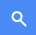
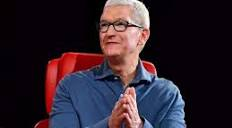
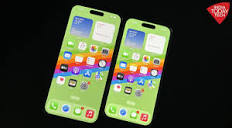
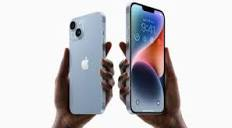

In [142]:
res.text

In [143]:
soup = bs4.BeautifulSoup(res.text)

<!DOCTYPE html>
<html lang="en-IN"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>apple - Google Search</title><script nonce="2vjEWHuv6z18CVRvKooRFw">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};
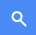
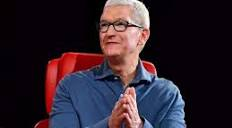
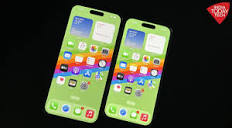
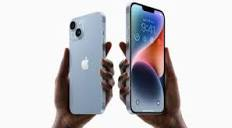

In [144]:
soup

In [145]:
soup.select("span",{"class":"OSrXXb"})

[<span class="V6gwVd">G</span>,
 <span class="iWkuvd">o</span>,
 <span class="cDrQ7">o</span>,
 <span class="V6gwVd">g</span>,
 <span class="ntlR9">l</span>,
 <span class="iWkuvd tJ3Myc">e</span>,
 <span class="OXXup">All</span>,
 <span class="OmTIzf"></span>,
 <span class="OmTIzf"></span>,
 <span class="CnP9N U3A9Ac irmCpc">Ad<span style="padding:0 5px">·</span></span>,
 <span style="padding:0 5px">·</span>,
 <span aria-hidden="true" class="ob9lvb" data-dtld="apple.com" role="text">www.apple.com/in</span>,
 <span>Apple - Official Site</span>,
 <span></span>,
 <span class="BNeawe"><a data-ved="2ahUKEwjamanEg8iAAxW-g5UCHcR9DI8QjBB6BAgDEAU" href="/url?q=https://www.apple.com/in/iphone/&amp;sa=U&amp;ved=2ahUKEwjamanEg8iAAxW-g5UCHcR9DI8QjBB6BAgDEAU&amp;usg=AOvVaw3HO4M0NHX-Lm8UIGtxrC8-" jsname="ACyKwe"><span class="XLloXe AP7Wnd">iPhone</span></a></span>,
 <span class="XLloXe AP7Wnd">iPhone</span>,
 <span class="BNeawe"><a data-ved="2ahUKEwjamanEg8iAAxW-g5UCHcR9DI8QjBB6BAgDEAc" href="/url?q

In [136]:
soup.select("a",{"jscontroller":"M9mgyc","jsname":"qOiK6e"})

[<a href="/?sa=X&amp;ved=0ahUKEwjqjZbm_seAAxX1r5UCHR28BOoQOwgC"><span class="V6gwVd">G</span><span class="iWkuvd">o</span><span class="cDrQ7">o</span><span class="V6gwVd">g</span><span class="ntlR9">l</span><span class="iWkuvd tJ3Myc">e</span></a>,
 <a href="/search?q=apple&amp;ie=UTF-8&amp;gbv=1&amp;sei=LozPZOq-MvXf1sQPnfiS0A4">here</a>,
 <a class="eZt8xd" href="/search?q=apple&amp;ie=UTF-8&amp;tbm=nws&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwjqjZbm_seAAxX1r5UCHR28BOoQ_AUIBigB">News</a>,
 <a class="eZt8xd" href="/search?q=apple&amp;ie=UTF-8&amp;tbm=isch&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwjqjZbm_seAAxX1r5UCHR28BOoQ_AUIBygC">Images</a>,
 <a class="eZt8xd" href="/search?q=apple&amp;ie=UTF-8&amp;tbm=shop&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwjqjZbm_seAAxX1r5UCHR28BOoQ_AUICCgD">Shopping</a>,
 <a href="https://maps.google.com/maps?q=apple&amp;um=1&amp;ie=UTF-8&amp;sa=X&amp;ved=0ahUKEwjqjZbm_seAAxX1r5UCHR28BOoQ_AUICSgE">Maps</a>,
 <a href="/search?q=apple&amp;ie=UTF-8&amp;tbm=vid&amp;s

In [166]:
a=soup.find_all("a")

In [168]:
a

[<a href="/?sa=X&amp;ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8QOwgC"><span class="V6gwVd">G</span><span class="iWkuvd">o</span><span class="cDrQ7">o</span><span class="V6gwVd">g</span><span class="ntlR9">l</span><span class="iWkuvd tJ3Myc">e</span></a>,
 <a href="/search?q=apple&amp;ie=UTF-8&amp;gbv=1&amp;sei=JpHPZNpuvofWxA_E-7H4CA">here</a>,
 <a class="eZt8xd" href="/search?q=apple&amp;ie=UTF-8&amp;tbm=nws&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUIBigB">News</a>,
 <a class="eZt8xd" href="/search?q=apple&amp;ie=UTF-8&amp;tbm=isch&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUIBygC">Images</a>,
 <a class="eZt8xd" href="/search?q=apple&amp;ie=UTF-8&amp;tbm=shop&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICCgD">Shopping</a>,
 <a href="https://maps.google.com/maps?q=apple&amp;um=1&amp;ie=UTF-8&amp;sa=X&amp;ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICSgE">Maps</a>,
 <a href="/search?q=apple&amp;ie=UTF-8&amp;tbm=vid&amp;so

In [187]:
b=soup.select("a",{"jscontroller":"M9mgyc","jsname":"qOiK6e","jsaction":"rcuQ6b:npT2md"})

In [191]:
b

[<a href="/?sa=X&amp;ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8QOwgC"><span class="V6gwVd">G</span><span class="iWkuvd">o</span><span class="cDrQ7">o</span><span class="V6gwVd">g</span><span class="ntlR9">l</span><span class="iWkuvd tJ3Myc">e</span></a>,
 <a href="/search?q=apple&amp;ie=UTF-8&amp;gbv=1&amp;sei=JpHPZNpuvofWxA_E-7H4CA">here</a>,
 <a class="eZt8xd" href="/search?q=apple&amp;ie=UTF-8&amp;tbm=nws&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUIBigB">News</a>,
 <a class="eZt8xd" href="/search?q=apple&amp;ie=UTF-8&amp;tbm=isch&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUIBygC">Images</a>,
 <a class="eZt8xd" href="/search?q=apple&amp;ie=UTF-8&amp;tbm=shop&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICCgD">Shopping</a>,
 <a href="https://maps.google.com/maps?q=apple&amp;um=1&amp;ie=UTF-8&amp;sa=X&amp;ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICSgE">Maps</a>,
 <a href="/search?q=apple&amp;ie=UTF-8&amp;tbm=vid&amp;so

In [195]:
for i in a:
    print(i.get("href"))

/?sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8QOwgC
/search?q=apple&ie=UTF-8&gbv=1&sei=JpHPZNpuvofWxA_E-7H4CA
/search?q=apple&ie=UTF-8&tbm=nws&source=lnms&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUIBigB
/search?q=apple&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUIBygC
/search?q=apple&ie=UTF-8&tbm=shop&source=lnms&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICCgD
https://maps.google.com/maps?q=apple&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICSgE
/search?q=apple&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICigF
/search?q=apple&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICygG
/advanced_search
/search?q=apple&ie=UTF-8&source=lnt&tbs=qdr:h&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8QpwUIDQ
/search?q=apple&ie=UTF-8&source=lnt&tbs=qdr:d&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8QpwUIDg
/search?q=apple&ie=UTF-8&source=lnt&tbs=qdr:w&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8QpwUIDw
/search

In [207]:
links=[]
for i in a:
    if i.get("href").startswith("/search?"):
        continue
    l=i.get("href")
    start_index = l.find("https")
    if start_index != -1:
        result_string = l[start_index:]
    links.append(result_string)
    print(result_string)


https://www.google.com/search?q%3D%2Bapple%26pccc%3D1&sig=0_JTlHYZ4Q6HL-y1JZqS8XGbKSNiM%3D&cs=2&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8QjcAJCMQB
https://maps.google.com/maps?q=apple&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICSgE
https://maps.google.com/maps?q=apple&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICSgE
https://maps.google.com/maps?q=apple&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICSgE
https://maps.google.com/maps?q=apple&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICSgE
https://maps.google.com/maps?q=apple&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICSgE
https://maps.google.com/maps?q=apple&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICSgE
https://maps.google.com/maps?q=apple&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjamanEg8iAAxW-g5UCHcR9DI8Q_AUICSgE
https://www.apple.com/in/&sa=U&ved=2ahUKEwjamanEg8iAAxW-g5UCHcR9DI8QFnoECAMQAg&usg=AOvVaw0XgB9_AemMeIKGdoIKUptW
https://www.apple.com/in/ip

In [209]:
def open_search_results(links):
    for link in links:
        webbrowser.open(link)
    
open_search_results(list(set(links)))

Final program 

In [231]:
import requests
import webbrowser
import bs4

def fetch_search_results(query):
    url = f"https://www.google.com/search?q={query}"
    response = requests.get(url)
    return response.text

def extract_search_links(html):
    soup = bs4.BeautifulSoup(html)
    a=soup.find_all("a")
    links=[]
    for i in a:
        if i.get("href").startswith("/search?"):
            continue
        l=i.get("href")
        start_index = l.find("https")
        if start_index != -1:
            result_string = l[start_index:]
            links.append(result_string)
    return links[:10]

def open_search_results(links):
    for link in links:
        webbrowser.open(link)

if __name__ == "__main__":
    search_keywords = input("Enter the search keywords: ")
    search_results_page = fetch_search_results(search_keywords)
    search_links = extract_search_links(search_results_page)
    open_search_results(search_links)

Project: Downloading All XKCD Comics

In [236]:
import requests, os, bs4
url = 'http://xkcd.com' 
os.makedirs('xkcd',exist_ok=True)
while not url.endswith('#'):
    print('Downloading page %s...' % url)
    res = requests.get(url)
    res.raise_for_status()
    soup=bs4.BeautifulSoup(res.text)

    comicElem = soup.select('#comic img')
    if comicElem == []:
        print('Could not find comic image.')
    else:
        comicUrl = comicElem[0].get('src')
        # Download the image.
        print('Downloading image %s...' % (comicUrl))
        res = requests.get("https:"+comicUrl)
        res.raise_for_status()
        imageFile = open(os.path.join('xkcd', os.path.basename(comicUrl)), 'wb')
        for chunk in res.iter_content(100000):
            imageFile.write(chunk)
        imageFile.close()
     
    prevLink = soup.select('a[rel="prev"]')[0]
    url = 'http://xkcd.com' + prevLink.get('href')
print("done")

KeyboardInterrupt: 